In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error
from pmdarima.arima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("gdp-per-capita-ppp-constant-2011.csv",index_col=0)

df.head()

,"GDP per capita, PPP (constant 2011 international $)"
Year,
1990,1754.857
1991,1737.615
1992,1796.532
1993,1845.149
1994,1930.113


In [4]:
y = df['GDP per capita, PPP (constant 2011 international $)']
len(y)

28

In [8]:
y_train = y[:-3]
y_test = y[-3:]
print(y_train.shape ,y_test.shape)

(25,) (3,)


In [9]:
model = auto_arima(y, trace=True, error_action='ignore', 
                   suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=301.294, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=301.598, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=299.039, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=300.739, Time=0.06 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=300.410, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=302.234, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.441 seconds


In [16]:
import numpy as np
forecast = model.predict(n_periods=3)
forecast = pd.DataFrame(np.around(forecast.values),index = np.arange(y.shape[0]+1,y.shape[0]+4),columns=['Prediction'])

forecast

,Prediction
29,6757.0
30,7088.0
31,7418.0


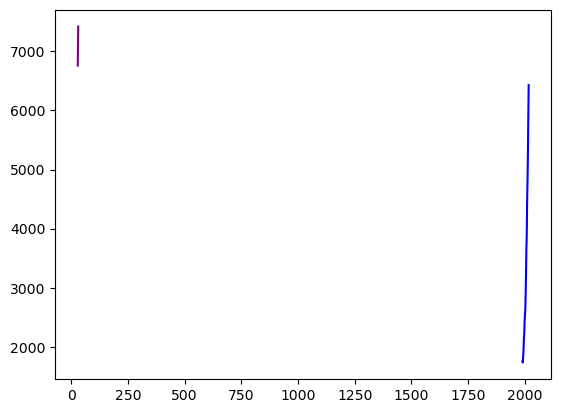

In [17]:
#plot the predictions for validation set

plt.plot(y, label='Train',color="blue")

plt.plot(forecast, label='Prediction',color="purple")
plt.show()

In [18]:
rms = sqrt(mean_squared_error(y_test,forecast.Prediction))
print('Test RMSE: %.3f' % rms)

Test RMSE: 994.654


# AutoETS


In [19]:
import os
import pandas as pd
#os.chdir("")
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.ets import AutoETS
from sktime.forecasting.base import ForecastingHorizon
from sktime.performance_metrics.forecasting import mean_squared_error
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

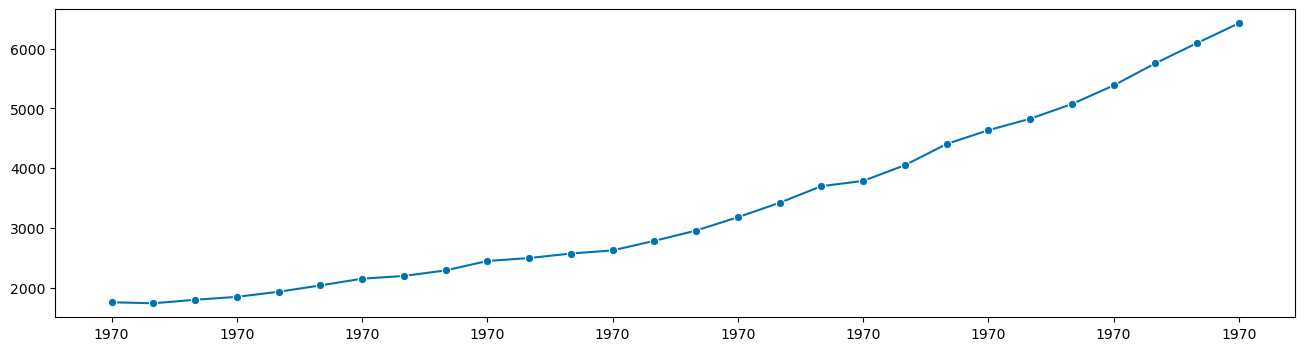

In [20]:
df=pd.read_csv("gdp-per-capita-ppp-constant-2011.csv",index_col=0)
df.head()
idx=pd.to_datetime(df.index).to_period("Y")
df.index = idx
plot_series(df)

(25,) (3,)


ValueError: array length 25 does not match index length 3

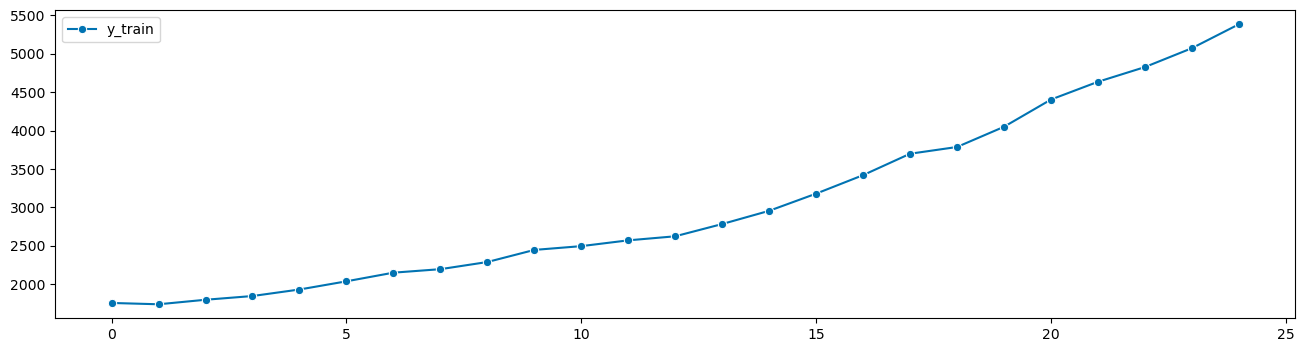

In [24]:
y=df["GDP per capita, PPP (constant 2011 international $)"]
y_train,y_test =temporal_train_test_split(y,test_size=3)
print(y_train.shape,y_test.shape)
plot_series(y_train,y_test,labels=["y_train","y_test"])
fh=ForecastingHorizon(y_test.index,is_relative=False)
fh

In [66]:
forecaster=AutoETS(auto=True,sp=12)
forecaster.fit(y_train)
print(forecaster.summary())

                                 ETS Results                                  
Dep. Variable:                      y   No. Observations:                  138
Model:                       ETS(MAM)   Log Likelihood                -497.437
Date:                Fri, 17 Nov 2023   AIC                           1030.874
Time:                        10:00:25   BIC                           1083.564
Sample:                    01-31-1949   HQIC                          1052.286
                         - 06-30-1960   Scale                            0.001
Covariance Type:               approx                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.7450      0.089      8.400      0.000       0.571       0.919
smoothing_trend       7.45e-05        nan        nan        nan         nan         nan
smoothing_season

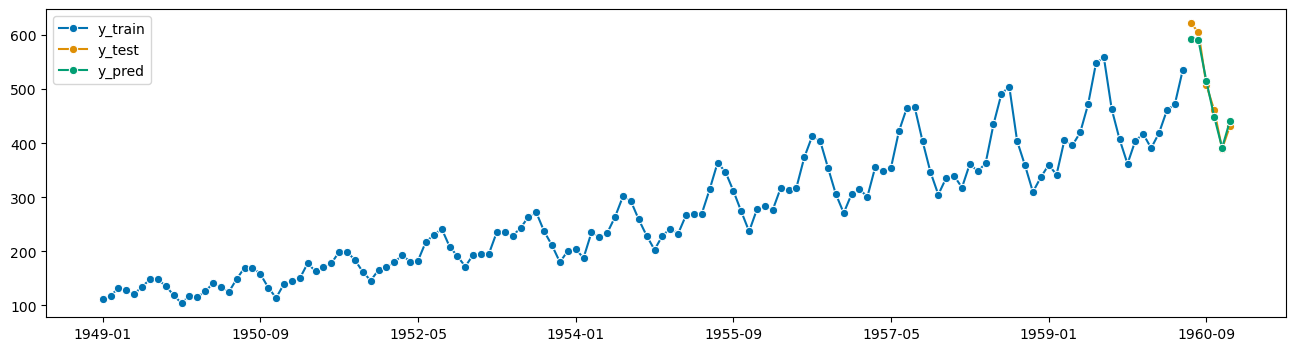

In [67]:
y_pred=forecaster.predict(fh)
plot_series(y_train,y_test,y_pred,labels=["y_train","y_test","y_pred"])
plt.show()

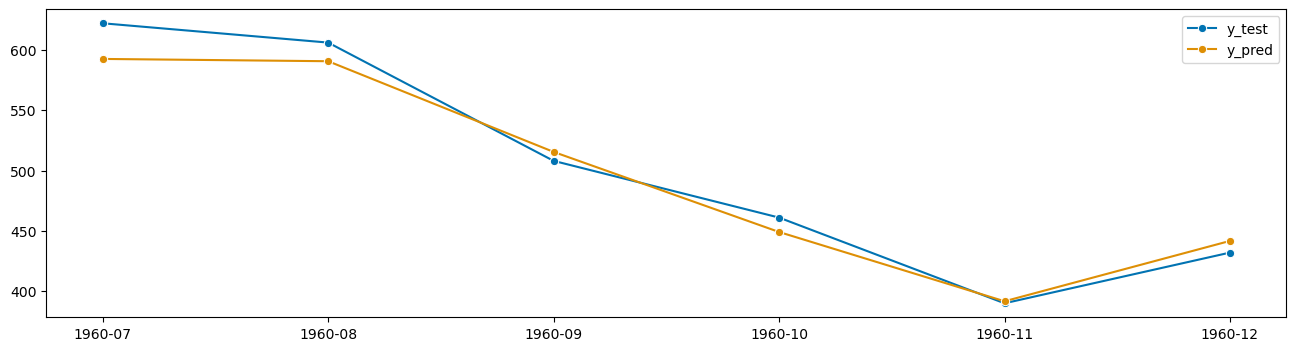

In [68]:
plot_series(y_test,y_pred,labels=["y_test","y_pred"])
plt.show()

In [69]:
mean_squared_error(y_test,y_pred,square_root=True)

15.302783836044014